Total loaded data points: 1500
x range: [59.66, 109.23]
y range: [46.03, 69.69]
----------------------------------------------------------------------
OPTIMAL PARAMETERS:
----------------------------------------------------------------------
θ = 29.9994° = 0.523589 radians
M = 0.030001
X = 54.998520
----------------------------------------------------------------------
PERFORMANCE METRICS:
----------------------------------------------------------------------
Total L1 distance: 20.0372
Average per point: 0.013358
Average error percentage: 1.34%
----------------------------------------------------------------------
VALIDATION:
----------------------------------------------------------------------
Range of x in fitted curve : [59.61, 109.23]
Range of y in fitted curve : [46.01, 69.69]
Range of x in given data : [59.66, 109.23]
Range of y in given data : [46.03, 69.69]



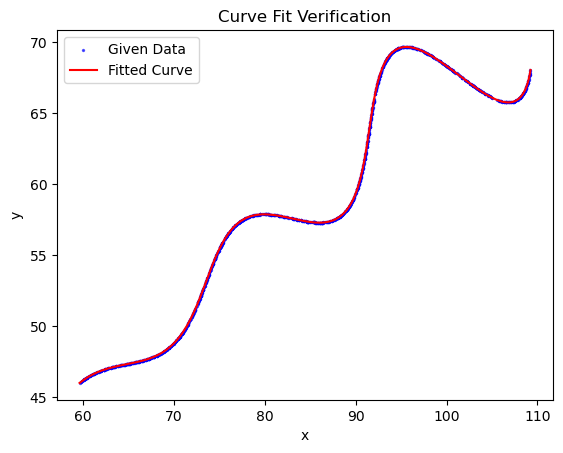

In [31]:
"""
Parametric Curve Fitting Solution
==================================

Problem:
--------
Given parametric equations:
    x = t * cos(Î¸) - e^(M|t|) * sin(0.3t) * sin(Î¸) + X
    y = 42 + t * sin(Î¸) + e^(M|t|) * sin(0.3t) * cos(Î¸)

Where:
    -> 0° < θ < 50° 
    -> -0.05 < M < 0.05 (exponential coefficient)
    -> 0 < X < 100 
    -> 6 < t < 60 (parameter range)

Objective:
----------
Find the values of unknown variables in the given parametric equation of a curve and 
minimize the L1 distance between uniformly sampled points on the curve and data points.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# ============================================================================
# STEP 1: Loading the data
# ============================================================================
data = pd.read_csv('xy_data.csv')
x_data = data['x'].values
y_data = data['y'].values

print(f"Total loaded data points: {len(x_data)}")
print(f"x range: [{x_data.min():.2f}, {x_data.max():.2f}]")
print(f"y range: [{y_data.min():.2f}, {y_data.max():.2f}]")
print("-" * 70)

# ============================================================================
# STEP 2: Defining the parametric curve equations
# ============================================================================
def parametric_curve(t, theta, M, X):

    # Computing x coordinate
    x = (t * np.cos(theta) - 
         np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + 
         X)

    # Computing y coordinate
    y = (42 + 
         t * np.sin(theta) + 
         np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta))

    return x, y

# ============================================================================
# STEP 3: Defining the objective function (L1 distance)
# ============================================================================
def objective_function(params):
    theta, M, X = params
    # i am using the same number of samples as data points for fair comparison
    t_samples = np.linspace(6, 60, len(x_data))
    x_curve, y_curve = parametric_curve(t_samples, theta, M, X)

    # For each data point, i will find the minimum L1 distance to any curve point
    total_distance = 0
    for x_d, y_d in zip(x_data, y_data):
        # Computing L1 distances to all curve points
        distances = np.abs(x_curve - x_d) + np.abs(y_curve - y_d)
        # Adding the minimum distance
        min_distance = np.min(distances)
        total_distance += min_distance

    return total_distance

# ============================================================================
# STEP 4: Setting up optimization constraints and bounds
# ============================================================================
bounds = [
    (0, 50 * np.pi / 180),  #(converting back to radians)
    (-0.05, 0.05),         
    (0, 100)               
]

# ============================================================================
# STEP 5: Running optimization with multiple initial guesses
# ============================================================================

# Defining multiple initial guesses to explore the parameter space
initial_guesses = [
    [25 * np.pi / 180, 0.0, 50],      # Middle of ranges
    [15 * np.pi / 180, 0.02, 30],     # Lower theta, positive M
    [35 * np.pi / 180, -0.02, 70],    # Higher theta, negative M
    [10 * np.pi / 180, 0.01, 40],     # Low theta
    [40 * np.pi / 180, -0.01, 60],    # High theta
]

best_result = None
best_loss = float('inf')

# Trying each initial guess
for i, init_guess in enumerate(initial_guesses):
    pass

    # Running L-BFGS-B optimization (good for bounded problems)
    result = minimize(
        objective_function, 
        init_guess, 
        method='L-BFGS-B', 
        bounds=bounds,
        options={'maxiter': 1000}
    )

    # Keeping track of the best result
    if result.fun < best_loss:
        best_loss = result.fun
        best_result = result

# ============================================================================
# STEP 6: Extracting and displaying of results
# ============================================================================
# Extracting optimal parameters
theta_opt = best_result.x[0]
M_opt = best_result.x[1]
X_opt = best_result.x[2]

# Converting theta to degrees
theta_deg = theta_opt * 180 / np.pi

# Displaying the results
print("OPTIMAL PARAMETERS:")
print("-" * 70)
print(f"θ = {theta_deg:.4f}° = {theta_opt:.6f} radians")
print(f"M = {M_opt:.6f}")
print(f"X = {X_opt:.6f}")
print("-" * 70)

print("PERFORMANCE METRICS:")
print("-" * 70)
print(f"Total L1 distance: {best_loss:.4f}")
print(f"Average per point: {best_loss/len(x_data):.6f}")
print(f"Average error percentage: {(best_loss/len(x_data))*100:.2f}%")
print("-" * 70)

# ============================================================================
# STEP 7: Validating the fit
# ============================================================================
print("VALIDATION:")
print("-" * 70)

# Generating curve points and curves with optimal parameters
t_validation = np.linspace(6, 60, 1500)
x_curve_opt, y_curve_opt = parametric_curve(t_validation, theta_opt, M_opt, X_opt)

print(f"Range of x in fitted curve : [{x_curve_opt.min():.2f}, {x_curve_opt.max():.2f}]")
print(f"Range of y in fitted curve : [{y_curve_opt.min():.2f}, {y_curve_opt.max():.2f}]")
print(f"Range of x in given data : [{x_data.min():.2f}, {x_data.max():.2f}]")
print(f"Range of y in given data : [{y_data.min():.2f}, {y_data.max():.2f}]")
print()

#Visual verification using curves

theta = theta_opt
M = M_opt
X = X_opt

# t range
t_vals = np.linspace(6, 60, 200)

# Parametric equations
x_fit = t_vals*np.cos(theta) - np.exp(M*np.abs(t_vals))*np.sin(0.3*t_vals)*np.sin(theta) + X
y_fit = 42 + t_vals*np.sin(theta) + np.exp(M*np.abs(t_vals))*np.sin(0.3*t_vals)*np.cos(theta)

# Plot your given data vs fitted curve
plt.scatter(data['x'], data['y'], color='blue', label='Given Data',s=2, alpha=0.6)
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Curve Fit Verification')
plt.show()
